In [35]:
import backtrader as bt
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt # Para la visualización de datos.

sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize']=(20,8)
%matplotlib inline 

In [36]:
df = yf.Ticker('AAPL')
data = bt.feeds.PandasData(dataname=df.history(start='2015-01-01', end='2024-01-01'))

### Crear una clase de estrategia


In [37]:
class SMACross(bt.Strategy):
    def __init__(self):
        self.sma1 = bt.indicators.SimpleMovingAverage(self.data.close, period=50)
        self.sma2 = bt.indicators.SimpleMovingAverage(self.data.close, period=200)
    
    def next(self):
        if not self.position: # No tenemos posición abierta
            if self.sma1 > self.sma2: # Regla de entrada
                self.buy()
        elif self.sma1 < self.sma2: # Regla de salida
            self.sell()

### Crear el cerebro y añadir estrategia


In [38]:
cerebro = bt.Cerebro()
cerebro.addstrategy(SMACross)

0

### Añadir datos al cerebro


In [39]:
cerebro.adddata(data)

### Configurar capital inicial


In [40]:
cerebro.broker.setcash(100000)

### Ejecutar el backtest


In [41]:
print(f'Valor Inicial: {cerebro.broker.getvalue()}')
cerebro.run()
print(f'Valor Final: {cerebro.broker.getvalue()}')


Valor Inicial: 100000
Valor Final: 100128.72611411163


### Graficar resultados

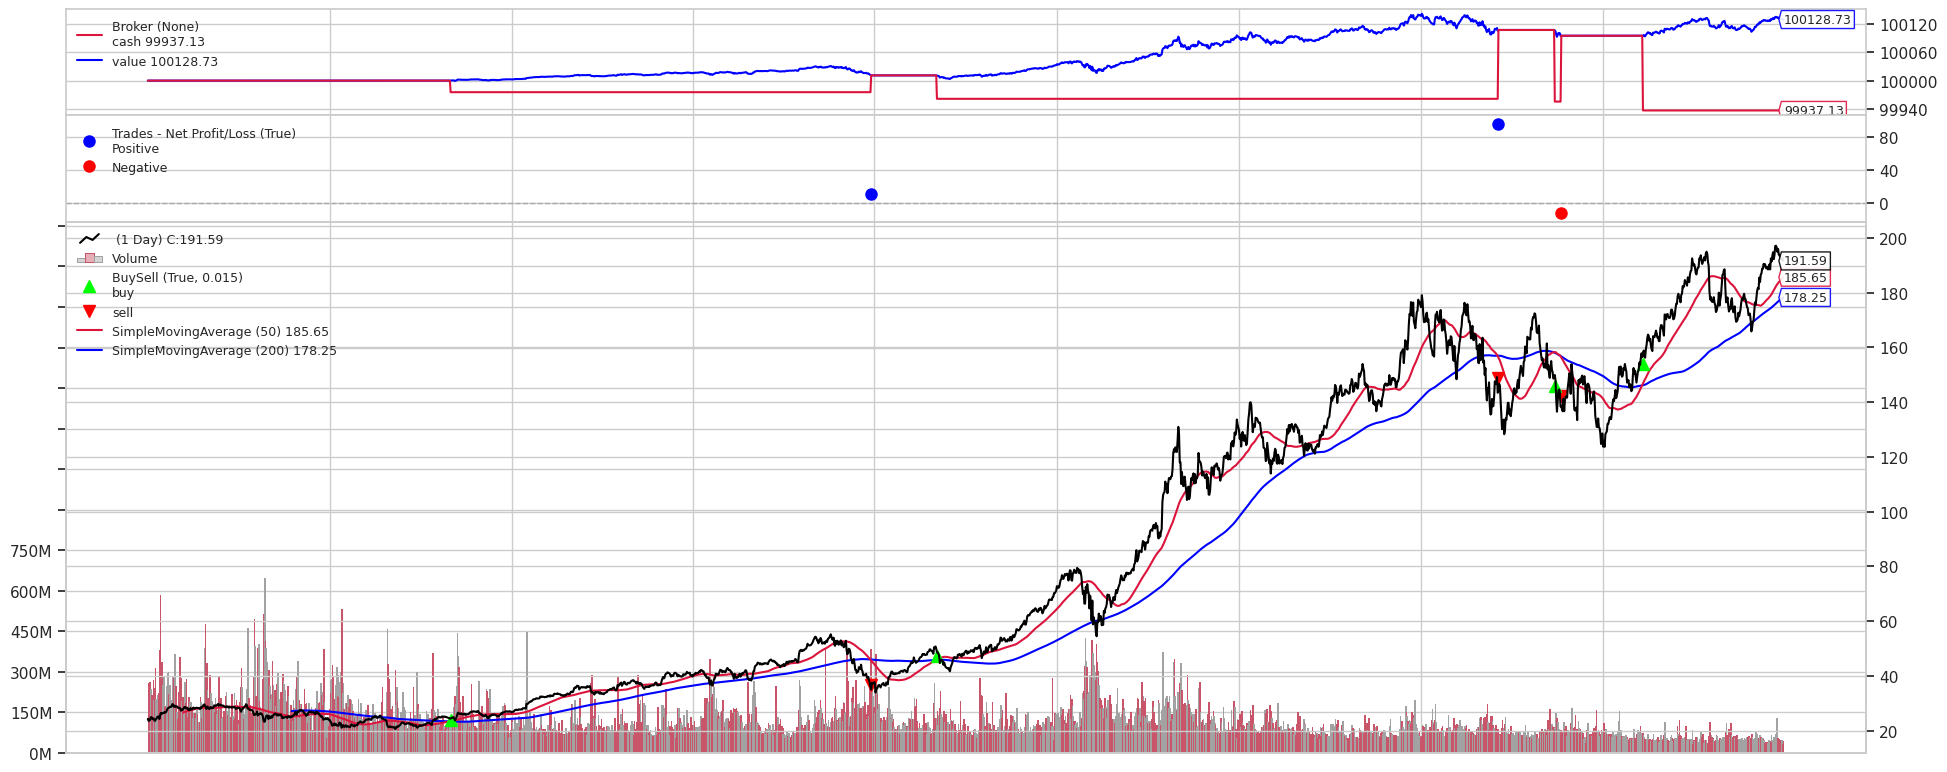

[[<Figure size 2000x800 with 4 Axes>]]

In [42]:
cerebro.plot(iplot=False)

### Rendimiento anualizado